Часть 2: Попытка узнать з/п по резюме или профилю линкедина. Inb4: ожидания з/п указаны в резюме.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from ipywidgets import widgets
from IPython.display import display

try:
  import google.colab
  from google.colab import files
  IN_COLAB = True
  path_prefix = 'https://raw.githubusercontent.com/a11ejandro/dou_careers/master/result_csv/'
except:
  IN_COLAB = False
  path_prefix = 'result_csv/'



source_df = pd.read_csv(path_prefix + 'concatenated_source.csv', parse_dates=['timestamp'])


/Users/alex/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (14,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
replaced_nan = lambda arr: ['N/A' if pd.isnull(x) else x for x in arr]

def unique_sort(series):
    unique = set(replaced_nan(series))
    return sorted(unique)

def unique_sort_multiple(series):
    replaced = replaced_nan(series)
    expanded = list(map(lambda x: x.split(','), replaced))
    unique = set(np.concatenate(expanded))
    return sorted(unique)

ENGLISH_LEVELS = ['элементарный', 'ниже среднего', 'средний', 'выше среднего', 'продвинутый']
EDUCATION_LEVELS = ['Среднее', 'Техникум / Колледж', 'Еще студент', 'Незаконченное высшее', 'Высшее', 'Два высших', 'Кандидат']
POSITIONS = unique_sort(source_df.position)
SPECIALITIES = unique_sort(source_df.speciality)
PROGRAMMING_LANGUAGES = unique_sort(source_df.programming_language)
CITIES = unique_sort(source_df.city)
COMPANY_SIZES = unique_sort(source_df.company_size)
COMPANY_TYPES = unique_sort(source_df.company_type)
GENDERS = unique_sort(source_df.gender)
UNIVERSITIES = unique_sort(source_df.university)
SUBJECT_AREAS = unique_sort(source_df.subject_area)
SUBJECT_AREAS = unique_sort_multiple(source_df.subject_area)



Ввод известных данных о кандидате.

In [17]:
def position_na(values):
    new_values = values.copy()
    
    if 'N/A' in new_values:
        new_values.remove('N/A')
        
    new_values.insert(0, 'N/A')
    return new_values

style = {'description_width': '200px'}
layout = widgets.Layout(width='50%')

university = widgets.Dropdown(
    options=position_na(UNIVERSITIES),
    description='Университет',
    style=style,
    layout=layout,
    disabled=False,
)

education = widgets.Dropdown(
    options=position_na(EDUCATION_LEVELS),
    description='Уровень образования',
    style=style,
    layout=layout,
    disabled=False,
)

programming_language = widgets.Dropdown(
    options = position_na(PROGRAMMING_LANGUAGES),
    description='Язык программирования',
    style=style,
    layout=layout,
    disabled=False
)

position = widgets.Dropdown(
    options=position_na(POSITIONS),
    description='Должность',
    style=style,
    layout=layout,
    disabled=False,
)

speciality = widgets.Dropdown(
    options=position_na(SPECIALITIES),
    description='Специализация',
    style=style,
    layout=layout,
    disabled=False,
)

gender = widgets.Dropdown(
    options=position_na(GENDERS),
    description='Пол',
    style=style,
    layout=layout,
    disabled=False,
)

city = widgets.Dropdown(
    options=position_na(CITIES),
    description='Город',
    style=style,
    layout=layout,
    disabled=False,
)

company_type = widgets.Dropdown(
    options=position_na(COMPANY_TYPES),
    description='Тип компании',
    style=style,
    layout=layout,
    disabled=False,
)

company_size = widgets.Dropdown(
    options=position_na(COMPANY_SIZES),
    description='Размер компании',
    style=style,
    layout=layout,
    disabled=False,
)

subject_area = widgets.Dropdown(
    options=position_na(SUBJECT_AREAS),
    description='Предметная область',
    style=style,
    layout=layout,
    disabled=False,
)

english_level = widgets.Dropdown(
    options=position_na(ENGLISH_LEVELS),
    description='Уровень Английского',
    style=style,
    layout=layout,
    disabled=False,
)

salary = widgets.FloatText(
    value=float('NaN'),
    description='Размер вознаграждения',
    style=style,
    layout=layout,
    disabled=False
)
                          
age = widgets.FloatText(
    value=float('NaN'),
    description='Возраст',
    style=style,
    layout=layout,
    disabled=False
)

total_experience = widgets.FloatText(
    value=float('NaN'),
    description='Общий опыт работы',
    layout=layout,
    style=style,
    disabled=False
)

current_experience = widgets.FloatText(
    value=float('NaN'),
    description='Опыт работы на текущем месте',
    style=style,
    layout=layout,
    disabled=False
)

actual_date = widgets.DatePicker(
    description='Дата, на которую информация была актуальной',
    style=style,
    layout=layout,
    disabled=False
)

lookup_future = widgets.RadioButtons(
    options=[True, False],
    description='Искать в поздних результатах',
    style=style,
    layout=layout,
    disabled=False
)


submit = widgets.Button(description="Обработать")

inputs = {
  'university': university,
  'education': education,
  'programming_language': programming_language,
  'position': position,
  'speciality': speciality,
  'gender': gender,
  'city': city,
  'company_type': company_type,
  'company_size': company_size,
  'english_level': english_level,
  'salary': salary,
  'subject_area': subject_area,
  'age': age,
  'exp': total_experience,
  'current_job_exp': current_experience,
  'timestamp': actual_date,
  'lookup_future': lookup_future,
  'submit': submit,
}



In [18]:
STRICT_MATCHES = ['university', 'position', 'programming_language', 'speciality', 'gender', 'city', 'company_type', 'company_size']
YEAR_MATCHES = ['age', 'exp', 'current_job_exp']

def strict_match(df, column, value):
    if value == 'N/A':
        return True
    return df[column] == value

def date_match(df, date, lookup_future=False):
    if pd.isnull(date):
        return True

    if lookup_future:
        search_window_start = date
        search_window_end = date + pd.Timedelta(182, 'D')
    else:
        search_window_start = date - pd.Timedelta(182, 'D')
        search_window_end = date
    
    return (df.timestamp > search_window_start) & (df.timestamp < search_window_end)

def education_level_match(df, education):
    if education == 'N/A':
        return True
    return df.education == EDUCATION_LEVELS.index(education)

def english_level_match(df, english_level):
    if english_level == 'N/A':
        return True
    return df.english_level == ENGLISH_LEVELS.index(english_level)

def years_match(df, column, value):
    if value == 'N/A' or pd.isnull(value):
        return True
    return (value - df[column]) <= 1

def salary_match(df, value):
    return (True if pd.isnull(value) else df['salary'] == value)
    

In [19]:
def apply_matchers(df):
    checks_results = list(map(lambda x: years_match(df, x, inputs[x].value), YEAR_MATCHES))
    checks_results += list(map(lambda x: strict_match(df, x, inputs[x].value), STRICT_MATCHES))
    checks_results.append(salary_match(df, inputs['salary'].value))
    checks_results.append(english_level_match(df, inputs['english_level'].value))
    checks_results.append(education_level_match(df, inputs['education'].value))
    checks_results.append(date_match(df, inputs['timestamp'].value, lookup_future = inputs['lookup_future'].value))

    result = checks_results[0]

    for new_check in checks_results[1:]:
        result = result & new_check
    
    return result
    

In [22]:
JOINED_SUFFIX='_joined'
SIMILAR_SUFFIX='_similar'
RELATION_SUFFIX='_relation'


EXTRACT_COLUMNS=['N', 'position', 'programming_language', 'speciality',
       'salary_delta_1y', 'city', 'company_size', 'company_type', 'gender',
       'university', 'subject_area', 'exp', 'current_job_exp', 'salary',
       'currency', 'cls', 'timestamp', 'english_level', 'education_level',
       'age']

def get_graph_dfs(df):
    primary_results = df.drop_duplicates(['N', 'timestamp'])[EXTRACT_COLUMNS]
    related_columns = list(map(lambda x: x + SIMILAR_SUFFIX, EXTRACT_COLUMNS))
    related = []

    for index, primary_row in primary_results.iterrows():
        related_rows = df[
            (df['N' + SIMILAR_SUFFIX] == primary_row['N']) &
            (df['timestamp' + SIMILAR_SUFFIX] == primary_row['timestamp'])
        ]
        
        related_rows = related_rows[related_columns].drop_duplicates()
        related_rows.columns = EXTRACT_COLUMNS
        related.append(related_rows)
        
    return primary_results, pd.concat(related)

output = widgets.Output()

join_df = pd.read_csv(path_prefix + 'join.csv', parse_dates=['timestamp', 'timestamp' + JOINED_SUFFIX])

def join_related_entries(df):
    join_straight = df.merge(
        join_df, 
        how='inner',
        on=['N', 'timestamp'],
    )

    join_reverse = df.merge(
        join_df, 
        how='inner',
        left_on=['N', 'timestamp'],
        right_on = ['N' + JOINED_SUFFIX, 'timestamp' + JOINED_SUFFIX],
        suffixes=['', RELATION_SUFFIX]
    )

    joined_straight = join_straight.merge(
        source_df,
        how='inner',
        left_on=['N' + JOINED_SUFFIX, 'timestamp' + JOINED_SUFFIX],
        right_on=['N', 'timestamp'],
        suffixes=['', SIMILAR_SUFFIX]
    )

    joined_reverse = join_reverse.merge(
        source_df,
        how='inner',
        left_on=['N' + RELATION_SUFFIX, 'timestamp' + RELATION_SUFFIX],
        right_on=['N', 'timestamp'],
        suffixes=['', SIMILAR_SUFFIX]
    )

    return pd.concat([joined_straight, joined_reverse])

found, related = None, None

def handle_submit(b):
    global found, related

    print('Обработка формы.')
    
    filtered_df = source_df[apply_matchers(source_df)]
    full_records = join_related_entries(filtered_df)

    found, related = get_graph_dfs(full_records)
    print('Данные отфильтрованы.')
    


submit.on_click(handle_submit)

[display(input, output) for input in inputs.values()]
print()


Dropdown(description='Университет', layout=Layout(width='50%'), options=('N/A', 'ВНТУ', 'ВНУ им. Даля', 'ГУТ',…

Output()

Dropdown(description='Уровень образования', layout=Layout(width='50%'), options=('N/A', 'Среднее', 'Техникум /…

Output()

Dropdown(description='Язык программирования', layout=Layout(width='50%'), options=('N/A', '1С', 'ABAP', 'APL',…

Output()

Dropdown(description='Должность', layout=Layout(width='50%'), options=('N/A', 'BI Engineer', 'Business Analyst…

Output()

Dropdown(description='Специализация', layout=Layout(width='50%'), options=('N/A', 'Automation QA', 'General QA…

Output()

Dropdown(description='Пол', layout=Layout(width='50%'), options=('N/A', 'женский', 'мужской'), style=Descripti…

Output()

Dropdown(description='Город', layout=Layout(width='50%'), options=('N/A', 'Винница', 'Днепр', 'Днепр.', 'Друго…

Output()

Dropdown(description='Тип компании', layout=Layout(width='50%'), options=('N/A', 'Аутсорсинговая', 'Аутстаффин…

Output()

Dropdown(description='Размер компании', layout=Layout(width='50%'), options=('N/A', 'до 10 человек', 'до 1000 …

Output()

Dropdown(description='Уровень Английского', layout=Layout(width='50%'), options=('N/A', 'элементарный', 'ниже …

Output()

FloatText(value=nan, description='Размер вознаграждения', layout=Layout(width='50%'), style=DescriptionStyle(d…

Output()

Dropdown(description='Предметная область', layout=Layout(width='50%'), options=('N/A', 'Android', 'Desktop App…

Output()

FloatText(value=nan, description='Возраст', layout=Layout(width='50%'), style=DescriptionStyle(description_wid…

Output()

FloatText(value=nan, description='Общий опыт работы', layout=Layout(width='50%'), style=DescriptionStyle(descr…

Output()

FloatText(value=nan, description='Опыт работы на текущем месте', layout=Layout(width='50%'), style=Description…

Output()

DatePicker(value=None, description='Дата, на которую информация была актуальной', layout=Layout(width='50%'), …

Output()

RadioButtons(description='Искать в поздних результатах', layout=Layout(width='50%'), options=(True, False), st…

Output()

Button(description='Обработать', style=ButtonStyle())

Output()


Обработка формы.
Данные отфильтрованы.
Обработка формы.
Данные отфильтрованы.
Обработка формы.
Данные отфильтрованы.
Обработка формы.
Данные отфильтрованы.


In [25]:
all_df = pd.concat([related, found])
print('Характеристики выборки:')
print(all_df.salary.describe([.1, .25, .5, .75, .9]))

Характеристики выборки:
count      159.000000
mean      3241.716981
std       2071.485372
min        300.000000
10%        900.000000
25%       1800.000000
50%       3100.000000
75%       4225.000000
90%       5000.000000
max      10000.000000
Name: salary, dtype: float64


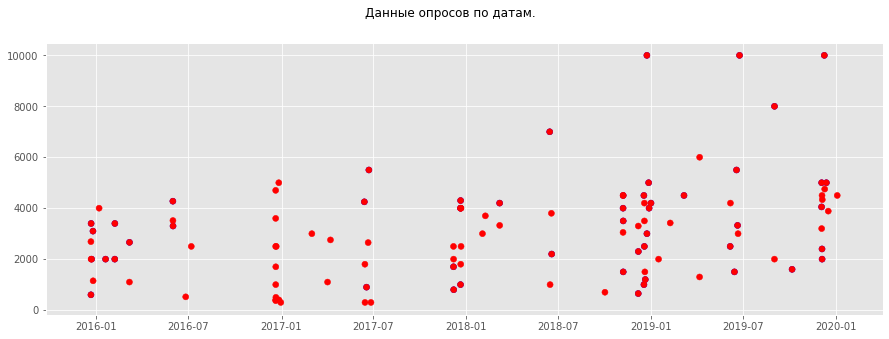

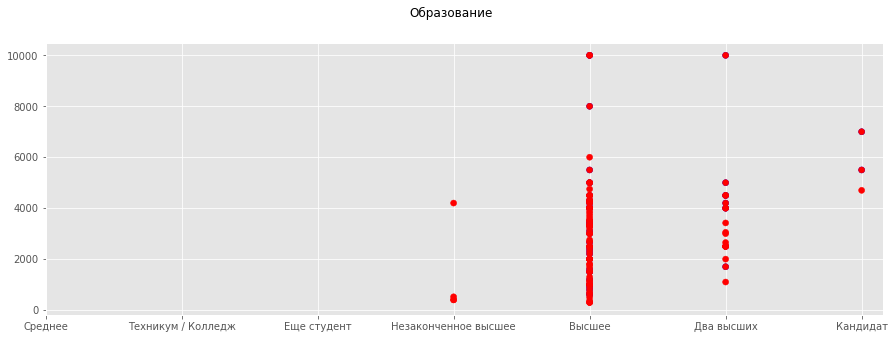

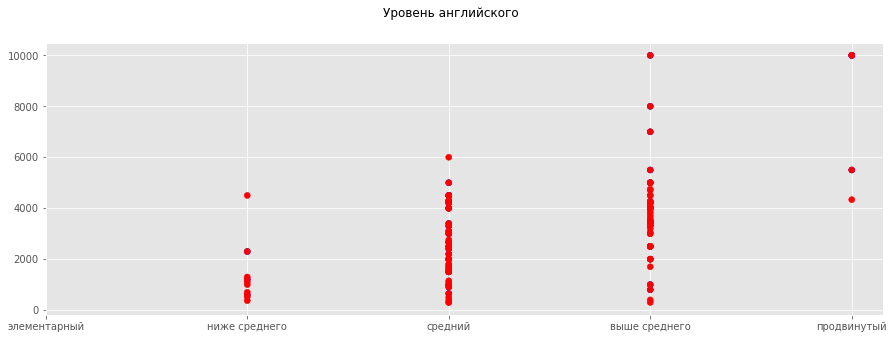

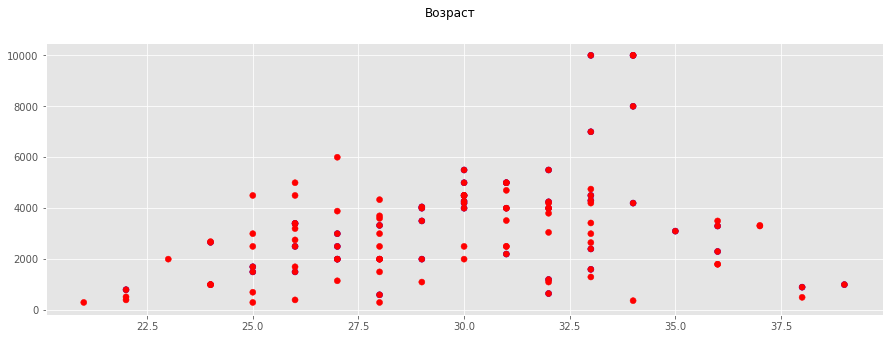

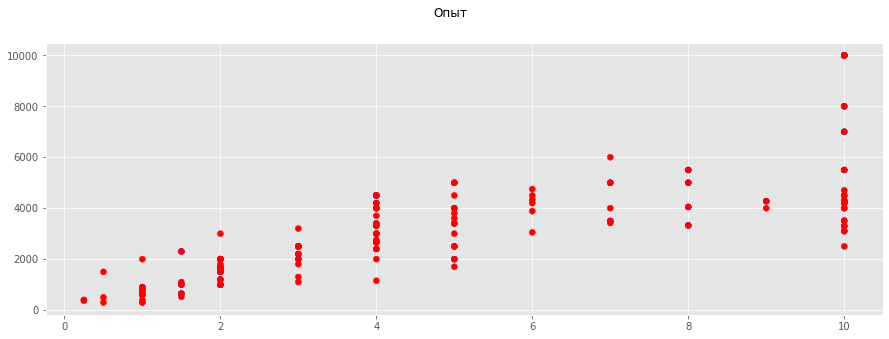

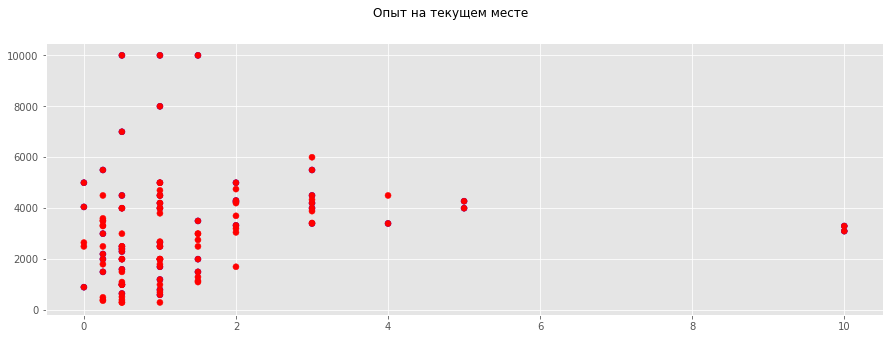

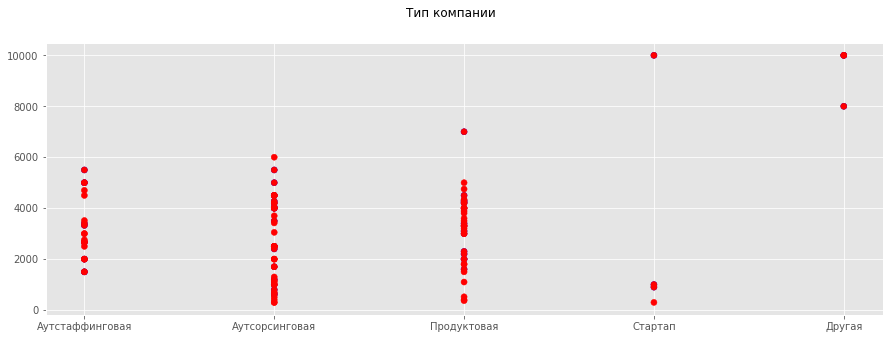

In [26]:
y = related['salary']
colors = ['#0000ff' for _ in y]
y = y.append(found['salary'])
colors += ['#ff0000' for _, __ in found.iterrows()]

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

timestamp = plt.figure()
timestamp.suptitle('Данные опросов по датам.')
x = all_df.timestamp
plt.scatter(x, y, c=colors)

education = plt.figure()
education.suptitle('Образование')
x = all_df.education_level
plt.scatter(x, y, c=colors)
plt.xticks(range(len(EDUCATION_LEVELS)), EDUCATION_LEVELS)

english = plt.figure()
english.suptitle('Уровень английского')
x = all_df.english_level
plt.scatter(x, y, c=colors)
plt.xticks(range(len(ENGLISH_LEVELS)), ENGLISH_LEVELS)

age = plt.figure()
age.suptitle('Возраст')
x = all_df.age
plt.scatter(x, y, c=colors)

exp = plt.figure()
exp.suptitle('Опыт')
x = all_df.exp
plt.scatter(x, y, c=colors)

exp = plt.figure()
exp.suptitle('Опыт на текущем месте')
x = all_df.current_job_exp
plt.scatter(x, y, c=colors)

exp = plt.figure()
exp.suptitle('Тип компании')
x = all_df.company_type
plt.scatter(x, y, c=colors)

exp = plt.figure()
exp.suptitle('Размер компании')
x = all_df.company_size
plt.scatter(x, y, c=colors)

plt.close()